# Loan Application Status Prediction

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [303]:
#importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc,classification_report
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier




In [304]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis(EDA)


In [305]:
data.shape

(614, 13)

In [306]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking for Number of NaN values in each column


In [307]:
#null values
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

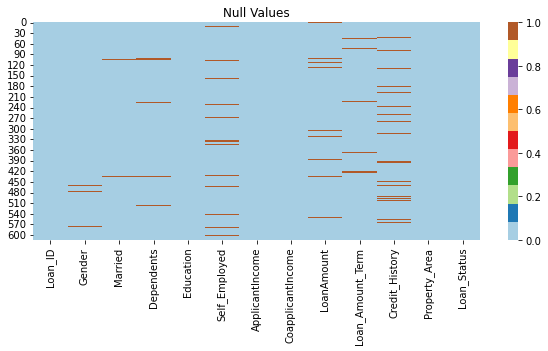

In [308]:
#Visualizeing null values
plt.figure(figsize=[10,4])
sns.heatmap(data.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

Checking the data types of the columns


In [309]:
data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Checking for duplicate records 

In [310]:
data.duplicated().sum()


0

Checking the Target Class count of the dataset 


In [311]:
data['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

Checking the unique values of the columns 


In [312]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [313]:
data['Gender'].unique()


array(['Male', 'Female', nan], dtype=object)

In [314]:
data['Married'].unique()


array(['No', 'Yes', nan], dtype=object)

In [315]:
data['Education'].unique()


array(['Graduate', 'Not Graduate'], dtype=object)

In [316]:
data['Self_Employed'].unique()


array(['No', 'Yes', nan], dtype=object)

In [317]:
data['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [318]:
data['Loan_Status'].unique()


array(['Y', 'N'], dtype=object)

In [319]:
data['Dependents'].unique()


array(['0', '1', '2', '3+', nan], dtype=object)

# Data Preprocessing 
Handling NaN values

In [320]:
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [321]:
data['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [322]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [323]:
data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Type conversion from float to int 


In [324]:
data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [325]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')
data['Credit_History']=data['Credit_History'].astype('int')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int')

In [326]:
data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int32
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

Handling invalid data


In [327]:
data['Dependents'].unique()


array(['0', '1', '2', '3+'], dtype=object)

In [328]:
data['Dependents'].replace('3+',3,inplace=True)


In [329]:
data['Dependents'].unique()


array(['0', '1', '2', 3], dtype=object)

In [330]:
data['Dependents']=data['Dependents'].astype('int')


In [331]:
data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int32
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

In [332]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,Y


# Visualization
Univariate Analysis

In [333]:
# checking for categorical columns
categorical_columns=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [334]:
# Now checking for numerical columns
numerical_columns=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


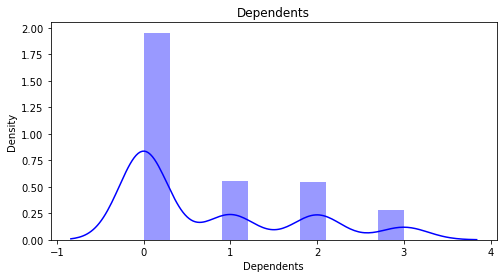

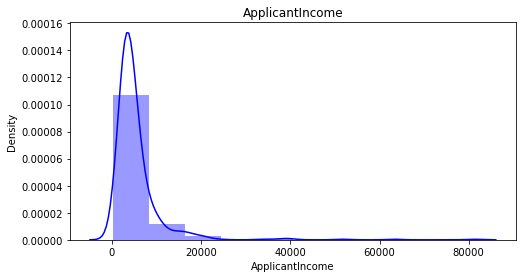

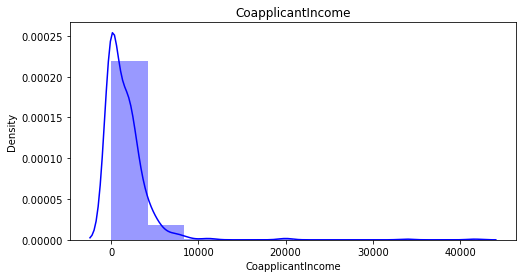

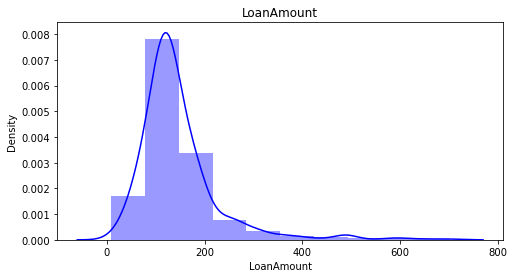

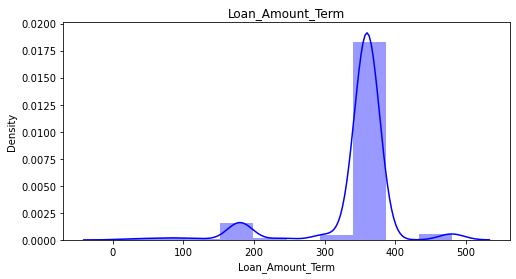

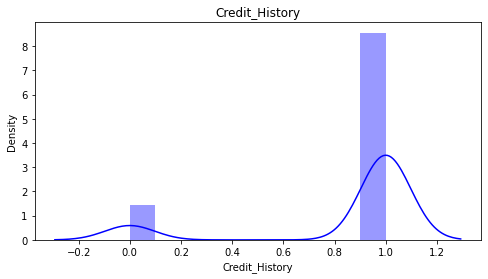

In [335]:
#Distribution plot for all numerical columns
for i in data[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(data[i], bins = 10, color="b")
    plt.title(i)
    plt.show()

All the numerical columns are skewed.



In [336]:
#Checking the value counts of Gender column
data.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

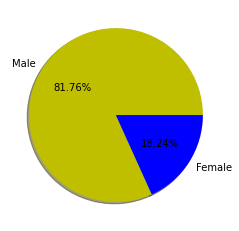

In [337]:
#Ploting pie chart for Gender
labels='Male','Female'
colors = ["y", "b"]
fig, ax = plt.subplots()
ax.pie(data['Gender'].value_counts(), labels=labels,colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

male applicants are 4 times then female applicants.



In [338]:
#Checking the value counts of Married column
data.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

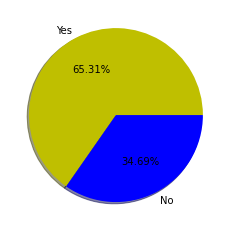

In [339]:
#Ploting pie chart for Married
labels='Yes','No'
colors = ["y", "b"]
fig, ax = plt.subplots()
ax.pie(data['Married'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

2/3 Applicants are married

In [340]:
#Checking the value counts of Education column
data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

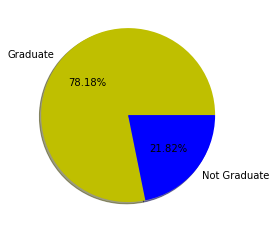

In [341]:
#Ploting pie chart for Education
labels='Graduate','Not Graduate'
colors = ["y", "b"]
fig, ax = plt.subplots()
ax.pie(data['Education'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

graduate applicants are almost 4 times then not graduate applicants.


In [342]:
#Checking the value counts of Self_Employed column
data.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

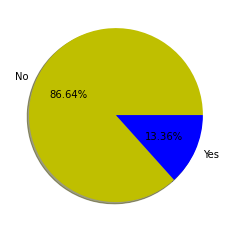

In [343]:
#Ploting pie chart for Self_Employed
labels='No','Yes'
colors = ["y", "b"]
fig, ax = plt.subplots()
ax.pie(data['Self_Employed'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the loan applicants are not self employed.



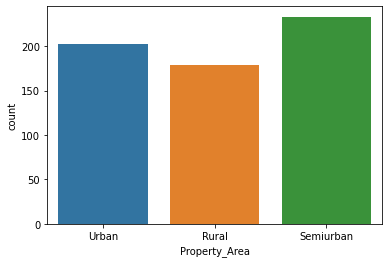

In [344]:
#Count plot for Property_Area
sns.countplot(data['Property_Area']);

No of applicants from semi-urban area are more then that of urban and rural.

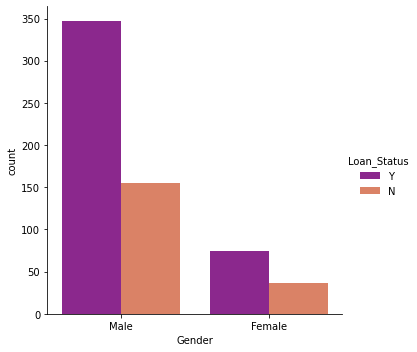

In [345]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=data,hue='Loan_Status',palette="plasma")
plt.xticks(rotation=0);

geting loan approvel are in the same ratio as application (comparing to "Gender")


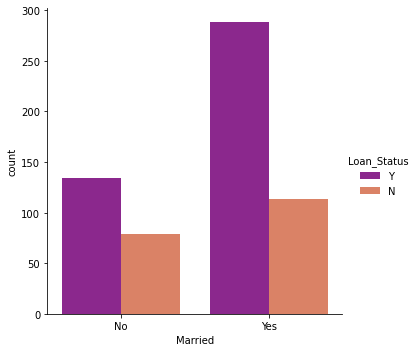

In [346]:
#Factor plot for Married
sns.factorplot('Married',kind='count',data=data,hue='Loan_Status',palette="plasma")
plt.xticks(rotation=0);

Married people has more chance of getting loan approved.



(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

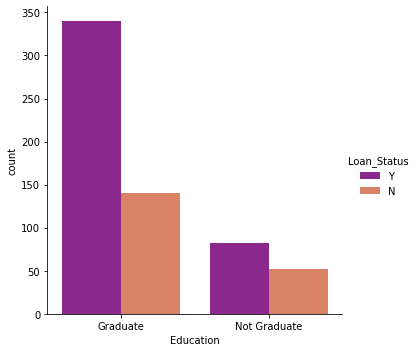

In [347]:
#Factor plot for Education
sns.factorplot('Education',kind='count',data=data,hue='Loan_Status',palette="plasma")
plt.xticks(rotation=0)

Graduated people has more chance of getting loan approved.



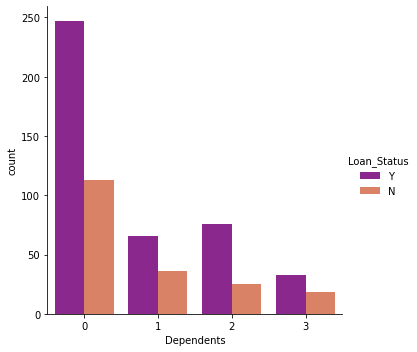

In [348]:
#Factor plot for Dependents
sns.factorplot('Dependents',kind='count',data=data,hue='Loan_Status',palette="plasma")
plt.xticks(rotation=0);

Applicants with 0 dependents has more chance of getting loan approved.



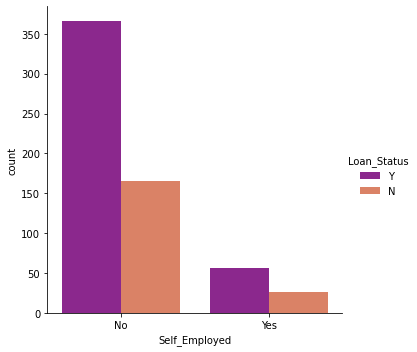

In [349]:
#Factor plot for Self_Employed
sns.factorplot('Self_Employed',kind='count',data=data,hue='Loan_Status',palette="plasma")
plt.xticks(rotation=0);

The applicants who are not self employed has more chance of getting loan approved.



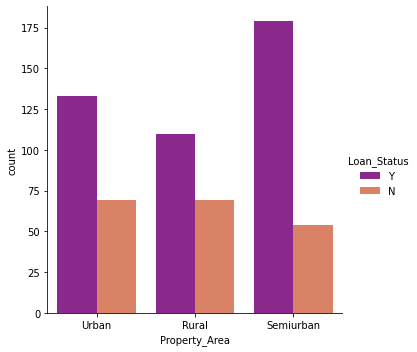

In [350]:
#Factor plot for Property_Area
sns.factorplot('Property_Area',kind='count',data=data,hue='Loan_Status',palette="plasma")
plt.xticks(rotation=0);

Applicants having property in semiurban area has more chance of getting loan approved.



<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

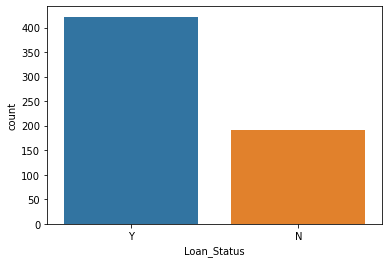

In [351]:
#Count plot for Loan_Status
sns.countplot(data['Loan_Status'])

By looking into the count plot of target column we can say that the data is imbalanced and need to balance it.



# Bivariate Analysis


<function matplotlib.pyplot.show(close=None, block=None)>

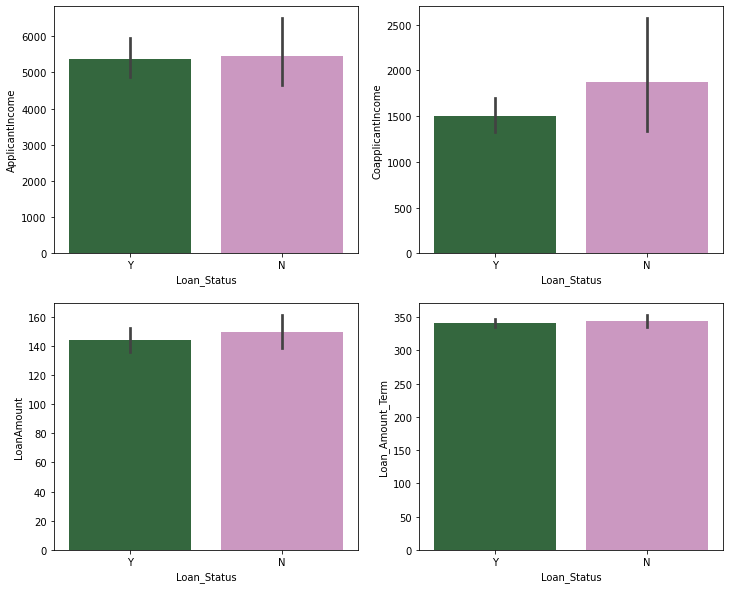

In [352]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Loan_Status with ApplicantIncome
sns.barplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,0],data=data,palette='cubehelix')

# Checking Loan_Status with CoapplicantIncome
sns.barplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[0,1],data=data,palette='cubehelix')

# Checking Loan_Status with LoanAmount
sns.barplot(x='Loan_Status',y='LoanAmount',ax=axes[1,0],data=data,palette='cubehelix')

# Checking Loan_Status with Loan_Amount_Term
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=data,palette='cubehelix')
plt.show

Based on applicant income the loan status has 50-50 of approval.

If the coapplicant income is about 2000 then the chance is more of getting loan approved.

Loan ammount and loan status also has 50% chance of approval.

For all loan amount term the chance of approval is also same.

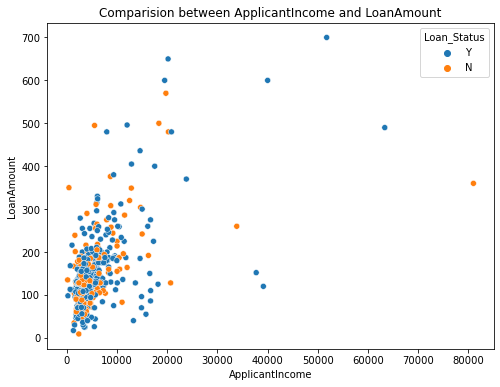

In [353]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(data['ApplicantIncome'],data['LoanAmount'],hue=data['Loan_Status']);

There is a high density of points in the range of 0-5000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-5000 then the loan amount will be approved in the range 0-300.

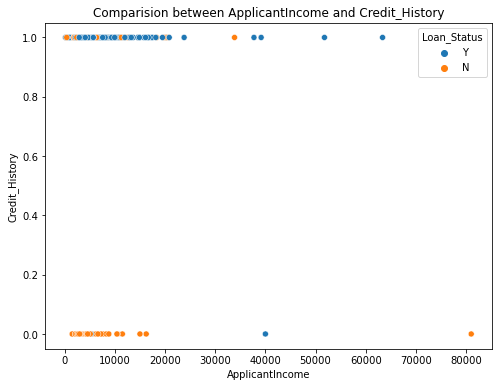

In [354]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and Credit_History')
sns.scatterplot(data['ApplicantIncome'],data['Credit_History'],hue=data['Loan_Status']);

If the applicant has credit history 1 then the chance of getting loan approved is more irrespective of Applicant Income.



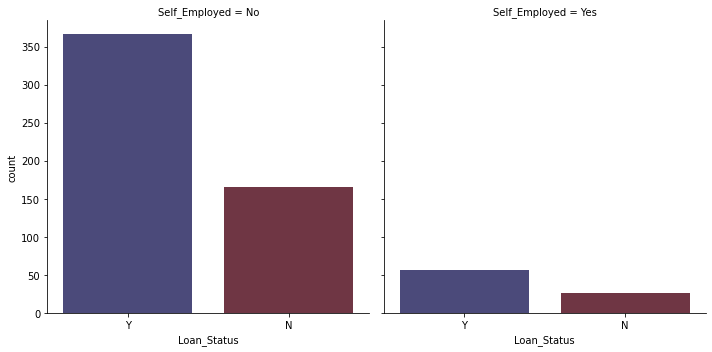

In [355]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Self_Employed',data=data,kind='count',palette="icefire")


Applicants who are not self employed has more chance of getting loan approved.



<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

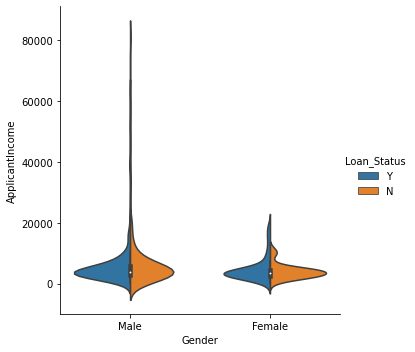

In [356]:
# Let's plot catplot for pair of features
sns.catplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", kind = "violin", data=data, split=True)
plt.xticks

Male applicants has chance of getting loan approved.Irrespective of Applicant Income.



<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

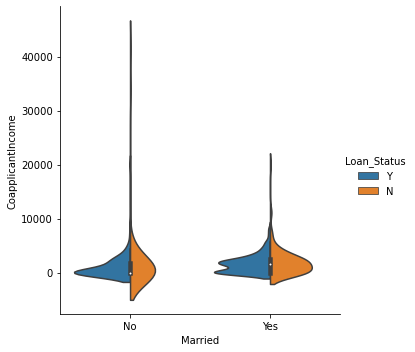

In [357]:
# Let's plot catplot for pair of features
sns.catplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", kind = "violin", data=data, split=True)
plt.xticks

Married people has better chance of getting loan approved.



<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

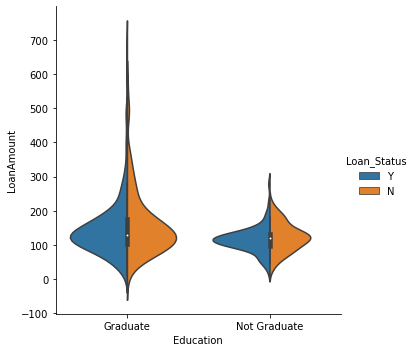

In [358]:
# Let's plot catplot for pair of features
sns.catplot(x = "Education", y = "LoanAmount", hue = "Loan_Status", kind = "violin", data=data, split=True)
plt.xticks

Graduated people has more chance of getting loan approved.



<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

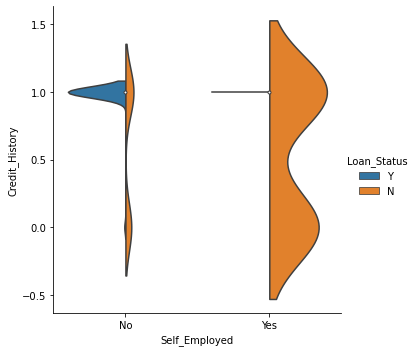

In [359]:
# Let's plot catplot for pair of features
sns.catplot(x = "Self_Employed", y = "Credit_History", hue = "Loan_Status", kind = "violin", data=data, split=True)
plt.xticks

There is very less chance of getting loan approved for self employed applicants.



# Multivariate Analysis


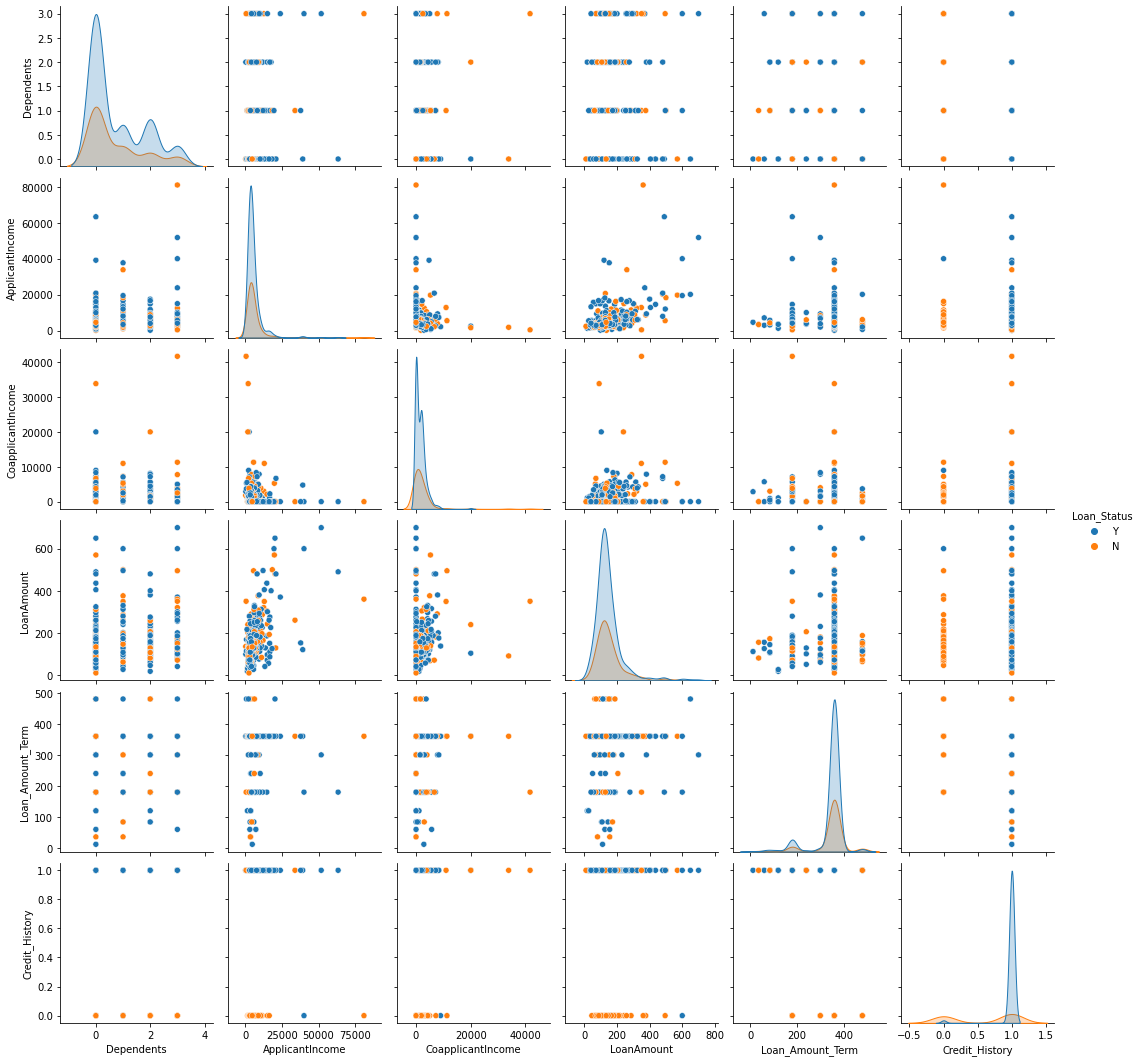

In [360]:
#pair ploting for data
sns.pairplot(data,hue="Loan_Status")

Above is the pair plot for having Laon_Status as target.There are some extreme outliers present in the dataset.



# Data Cleaning
Checking for outliers

<AxesSubplot:>

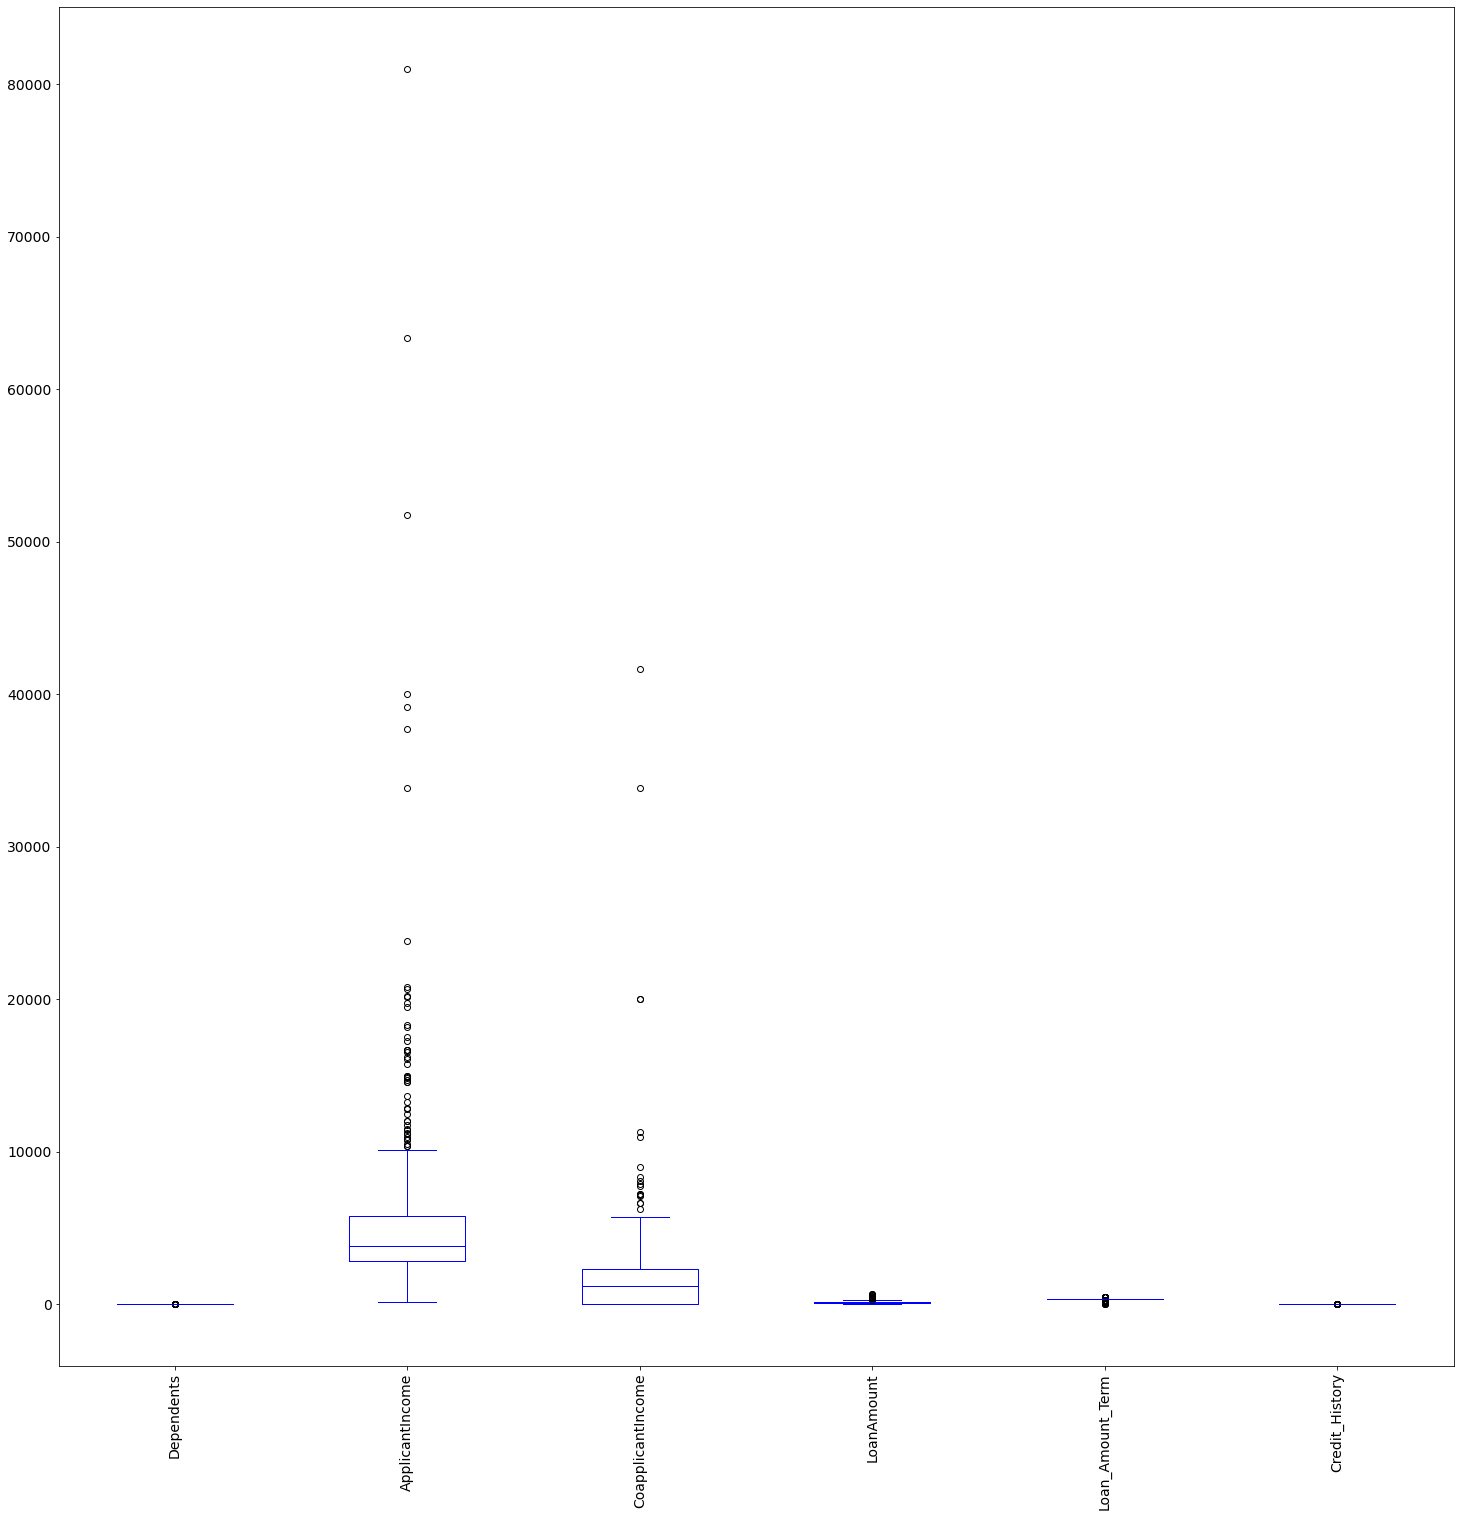

In [361]:
#Checking for outliers using boxplot
data.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='b')

Since Credit_History,Loan_Amount_Term is a Categorical column no need to remove outliers.In all other 4 numerical columns we have to remove outliers.



# Removing Outliers:
Zscore method

In [362]:
#Features having outliers
features=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
z=np.abs(zscore(features))
df=data[(z<3).all(axis=1)]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71.0,360,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0,40.0,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253.0,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187.0,360,1,Urban,Y


In [363]:
#Checking shape of new dataset
df.shape

(577, 13)

In [364]:
#Checking shape of old dataset
data.shape

(614, 13)

In [365]:
#Checking dataloss in zscore method
Dataloss = (((614-577)/614)*100)
Dataloss

6.026058631921824

data loss is 6% .

# Checking for skewness

In [366]:
#Checking for skewness
df.skew()

Dependents           1.052106
ApplicantIncome      2.148522
CoapplicantIncome    1.350518
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

No need to remove skewness in Credit_History,Loan_Amount_Term since we can consider it as categorical column.



# Removing skewness using yeo-johnson method


In [367]:
#number_datatype
number_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        number_datatypes.append(x)
print('number datatype = ',number_datatypes)        


for col in number_datatypes:
    if data.skew().loc[col]>.55:
        data[col]=np.log1p(data[col])

number datatype =  ['ApplicantIncome', 'LoanAmount']


In [374]:
#Creating a list of skewed features
features=["ApplicantIncome","LoanAmount"]

Taking a list as features with all the columns with skewness.



In [376]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [377]:
df[features] = scaler.fit_transform(df[features].values)


In [378]:
data.skew()


Dependents           1.015551
ApplicantIncome      0.482128
CoapplicantIncome    7.491530
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Using yeo_johnson method skewness has been removed.



In [379]:
#Checking skewness again
df[features].skew()

ApplicantIncome   -0.246179
LoanAmount        -0.046722
dtype: float64

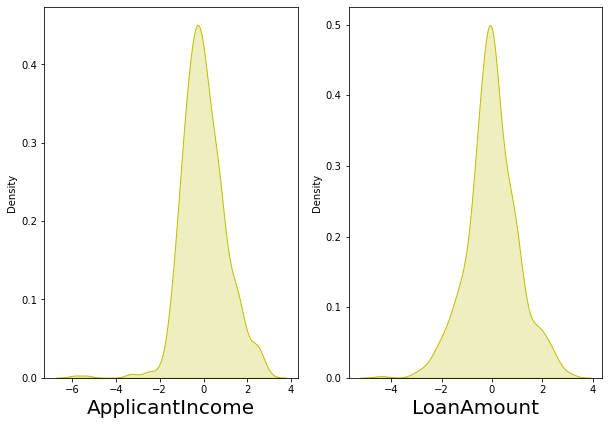

In [380]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color='y',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

It looks like the skewness is removed completely.

# Label Encoding

In [388]:
# Separating categorical columns in df_new
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [389]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [391]:
df[cat_col].head()


,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1


Checking correlation using heat map:


In [393]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.060636,0.234549,0.172828,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.026650,0.335817,0.182897,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.107059,0.004110,0.131195,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.174333,0.049741,-0.126560,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.205735,-0.087336,0.116611,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060636,-0.026650,0.107059,-0.174333,0.205735,1.000000,-0.359936,0.424387,-0.070423,0.027369,-0.011176,-0.001801
CoapplicantIncome,0.234549,0.335817,0.004110,0.049741,-0.087336,-0.359936,1.000000,0.201829,0.000952,0.006562,-0.074472,0.079342
LoanAmount,0.172828,0.182897,0.131195,-0.126560,0.116611,0.424387,0.201829,1.000000,0.049798,-0.004831,-0.099574,-0.023034
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.070423,0.000952,0.049798,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.027369,0.006562,-0.004831,0.027392,1.000000,-0.008121,0.560936


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let's plot it using heat map.



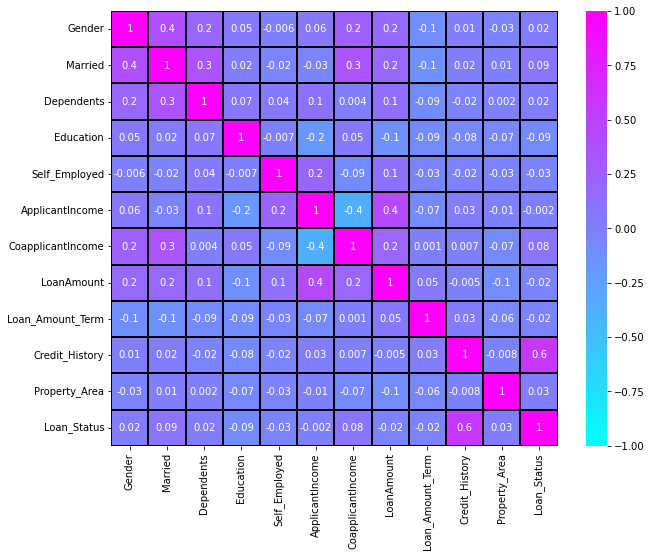

In [395]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="cool")
plt.yticks(rotation=0);

There is no multicolinearity issue in this dataset.

I can notice that with target column ApplicantIncome and CoapplicantIncome is very less correlated.

Let me plot bar plot of target correlation to get better vission.

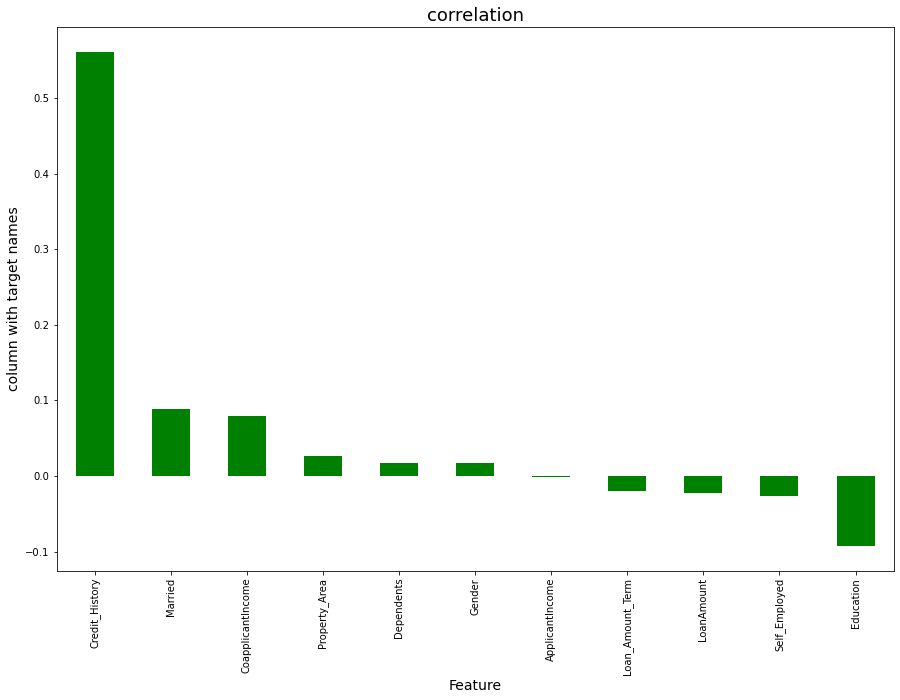

In [399]:
plt.figure(figsize=(15,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [400]:
#Droping less correlated column
df = df.drop(["CoapplicantIncome"],axis=1)

# Separating features and label

In [401]:
x = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

Scaling the data using standard scaler


In [402]:
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [403]:
X.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.693376,0.013122,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.258101,0.013122,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.511665,-1.452223,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.786776,-0.141640,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.738669,0.249719,0.230853,0.418513,1.227472


This is the data of independent variables after scaling.



Splitting the data into Train and Test datasets


In [429]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [472]:
y.value_counts()


1    398
0    179
Name: Loan_Status, dtype: int64

In [485]:
#To check dimensions 
print(X_train.shape)
print(X.shape)
print(y_train.shape)
print(y_test.shape)

(461, 10)
(577, 10)
(461,)
(116,)


# Building KNN :
Hyperparameter tuning using RandomizedSearchCv

In [494]:
neighbors = list(range(1,31, 2))
clf=KNeighborsClassifier()
param_grid = {'n_neighbors': neighbors}
KNN_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=200,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
KNN_Randomecv=KNN_cv.fit(X_train,y_train)

In [495]:
KNN_Randomecv.best_params_


{'n_neighbors': 9}

# Standardizing the data

In [496]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [497]:
KNN = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
KNN.fit(X_train_std, y_train)#fitting the model
y_train_pred=KNN.predict(X_train_std)
y_test_pred=KNN.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.8264642082429501
The Test Accuracy is : 0.7931034482758621


Plotting ROC Curvres

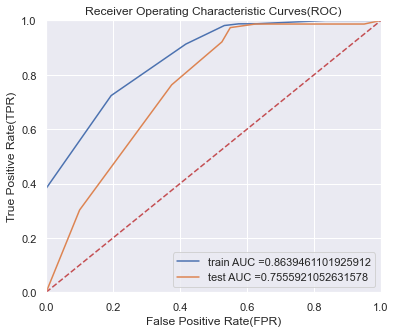

In [498]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  KNN.predict_proba(X_train_std)[:,1]
y_test_pred_proba=KNN.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Plotting Confusion Matrix

In [499]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

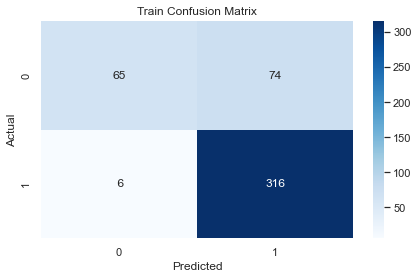

In [500]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

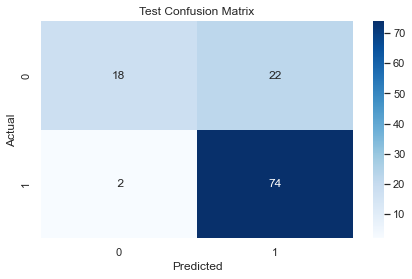

In [501]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

Classification Report

In [502]:
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classification report is :",Classificationreport_train)
print("Testing Classification reportt is :",Classificationreport_test)

Training Classification report is :               precision    recall  f1-score   support

           0       0.92      0.47      0.62       139
           1       0.81      0.98      0.89       322

    accuracy                           0.83       461
   macro avg       0.86      0.72      0.75       461
weighted avg       0.84      0.83      0.81       461

Testing Classification reportt is :               precision    recall  f1-score   support

           0       0.90      0.45      0.60        40
           1       0.77      0.97      0.86        76

    accuracy                           0.79       116
   macro avg       0.84      0.71      0.73       116
weighted avg       0.82      0.79      0.77       116



# Building Logistic Regression
Hyperparameter tuning using Randomizedseachcv

In [503]:
clf=LogisticRegression(penalty='l1',random_state=2,n_jobs=-1,solver='liblinear')
param_grid = {'C': [0.0001,0.001,0.01, 0.1, 1, 10, 100]}
Random_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
Log_Randomecv=Random_cv.fit(X_train_std,y_train)

# Finding best parameters 

In [504]:
Log_Randomecv.best_params_


{'C': 0.01}

# Building Logistic Regression with best C value


In [505]:
log=LogisticRegression(C=0.01,penalty='l1',random_state=3,n_jobs=-1,solver='liblinear')
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred=log.predict(X_train_std)
y_test_pred=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))


The Training Accuracy is : 0.8221258134490239
The Test Accuracy is : 0.8017241379310345


# Plotting ROC Curves 

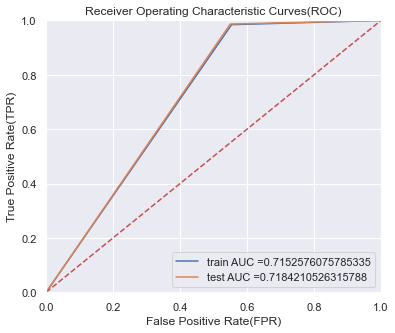

In [506]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Plotting Confusion Matrices 

In [507]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

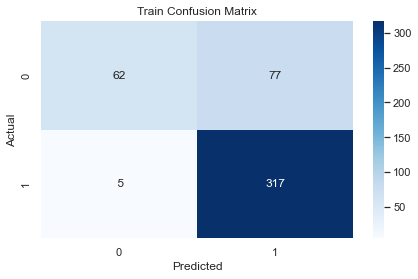

In [508]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

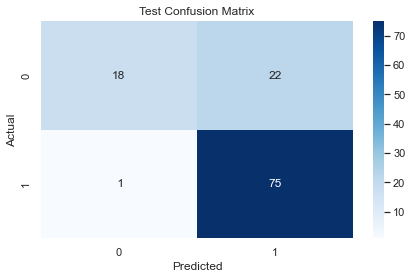

In [509]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification report 

In [510]:
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.93      0.45      0.60       139
           1       0.80      0.98      0.89       322

    accuracy                           0.82       461
   macro avg       0.86      0.72      0.74       461
weighted avg       0.84      0.82      0.80       461

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.95      0.45      0.61        40
           1       0.77      0.99      0.87        76

    accuracy                           0.80       116
   macro avg       0.86      0.72      0.74       116
weighted avg       0.83      0.80      0.78       116



# Building the model using Decision Tree
Hyperparameter tuning using Randomizedcv

In [511]:
# Assigning values to the parameters
depth=[5, 10, 50, 100, 500]
min_samples_split=[5,10,20,30,40,50]
criterion=["gini", "entropy"]
params_grid=dict(max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)

In [512]:
# Estimator
DT=DecisionTreeClassifier(random_state=4)

In [513]:
# Building RandomizedsSearchCV

DT_RandomCV=RandomizedSearchCV(DT,params_grid,cv=10,n_iter=200,scoring='accuracy',n_jobs=-1)
DT_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, 500],
                                        'min_samples_split': [5, 10, 20, 30, 40,
                                                              50]},
                   scoring='accuracy')

# Finding best parameters 

In [514]:
DT_RandomCV.best_params_


{'min_samples_split': 50, 'max_depth': 5, 'criterion': 'gini'}

# Building Decision Tree model using best parameters


In [516]:
DT_clf=DecisionTreeClassifier(min_samples_split=30,max_depth=5,criterion='entropy',random_state=5,class_weight='balanced')
DT_clf.fit(X_train,y_train)
y_pred_train_DT=DT_clf.predict(X_train)
y_pred_test_DT=DT_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_DT))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_DT))

The Training Accuracy is : 0.8134490238611713
The Test Accuracy is : 0.7586206896551724


# Plotiing ROC Curves 


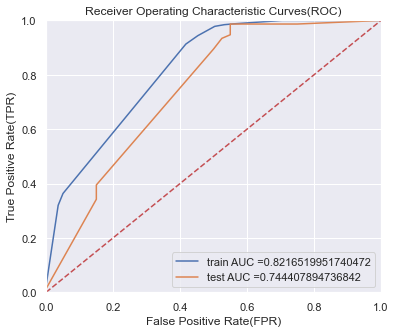

In [517]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  DT_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=DT_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Plotting Confusion Matrices 

In [518]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_pred_train_DT)
Test_Confusion_Matrix=confusion_matrix(y_test,y_pred_test_DT)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

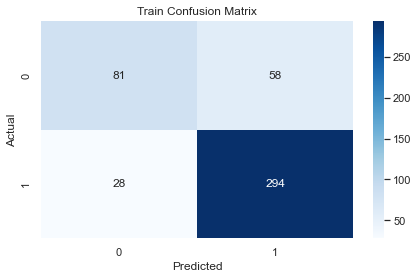

In [519]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

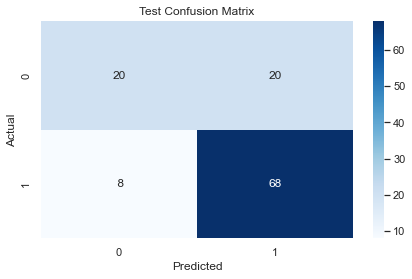

In [520]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification report 

In [521]:
Classificationreport_train=classification_report(y_train,y_pred_train_DT)
Classificationreport_test=classification_report(y_test,y_pred_test_DT)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.74      0.58      0.65       139
           1       0.84      0.91      0.87       322

    accuracy                           0.81       461
   macro avg       0.79      0.75      0.76       461
weighted avg       0.81      0.81      0.81       461

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.71      0.50      0.59        40
           1       0.77      0.89      0.83        76

    accuracy                           0.76       116
   macro avg       0.74      0.70      0.71       116
weighted avg       0.75      0.76      0.75       116



# Building Random Forest model
Hyperparameter tuning using Randomizedsearchcv

In [522]:
# Assigning values to the parameters

depth=[5, 10, 20,30]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid


{'n_estimators': [50, 100, 150, 200],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [523]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=2,n_jobs=-1)

In [524]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=10,scoring='accuracy',n_jobs=-1,n_iter=100)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=2),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30],
                                        'min_samples_split': [5, 10, 20, 30, 40,
                                                              50],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='accuracy')

# Finding best parameters 

In [525]:
RF_RandomCV.best_params_


{'n_estimators': 50,
 'min_samples_split': 10,
 'max_depth': 5,
 'criterion': 'entropy'}

# Building Random Forest model using best parameters 

In [526]:
RF_clf=RandomForestClassifier(n_estimators=200,min_samples_split=30,max_depth=30,criterion='gini',random_state=3,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 0.8438177874186551
The Test Accuracy is : 0.8017241379310345


# Plotting ROC Curves 

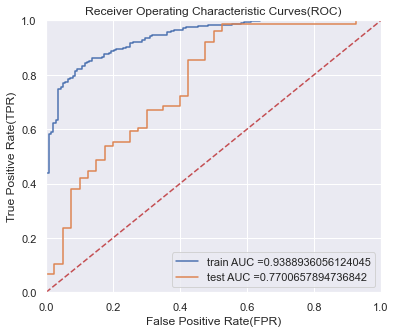

In [527]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  RF_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=RF_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

Plotting Confusion Matrices 

In [528]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

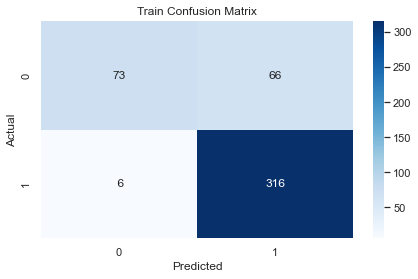

In [529]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

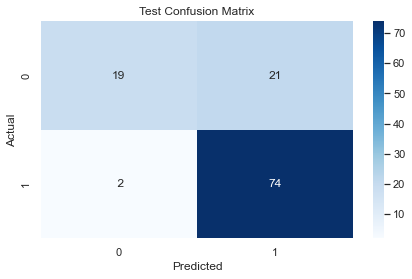

In [530]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification report 

In [531]:
Classificationreport_train=classification_report(y_train,y_train_pred_RF)
Classificationreport_test=classification_report(y_test,y_test_pred_RF)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.92      0.53      0.67       139
           1       0.83      0.98      0.90       322

    accuracy                           0.84       461
   macro avg       0.88      0.75      0.78       461
weighted avg       0.86      0.84      0.83       461

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.90      0.47      0.62        40
           1       0.78      0.97      0.87        76

    accuracy                           0.80       116
   macro avg       0.84      0.72      0.74       116
weighted avg       0.82      0.80      0.78       116



# Building XGBOOST Classifier
Hyperparameter tuning

In [532]:
# Assigning values to the parameters
depth=[1, 5, 10, 50, 100, 200]
estimators=[50,70,90,110,130,150,170]
params_grid=dict(max_depth=depth,n_estimators=estimators)

In [533]:
# Estimator

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=5,n_jobs=-1)

In [534]:
# Building RandomizedsSearchCV

xgb_RandomCV=RandomizedSearchCV(xgb,params_grid,cv=5,scoring='accuracy',n_jobs=-1)
xgb_RandomCV.fit(X_train,y_train)

[13:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                       

# Finding best parameters 


In [535]:
xgb_RandomCV.best_params_


{'n_estimators': 170, 'max_depth': 1}

# Building Xgboost with best parameters


In [537]:
XGB=XGBClassifier(n_estimators=70,max_depth=1,random_state=6,n_jobs=-1)
XGB.fit(X_train,y_train)
y_train_pred_XGBF=XGB.predict(X_train)
y_test_pred_XGB=XGB.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_XGBF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_XGB))

[13:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Training Accuracy is : 0.8199566160520607
The Test Accuracy is : 0.8017241379310345


# Plotting ROC Curves 

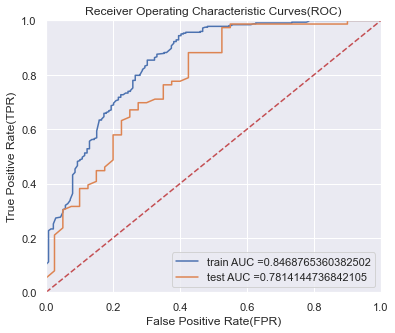

In [538]:
y_train_pred_proba =  XGB.predict_proba(X_train)[:,1]
y_test_pred_proba=XGB.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Confusion Matrices 

In [539]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_XGBF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_XGB)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

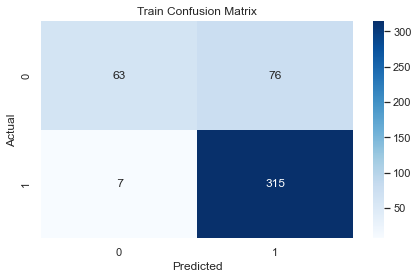

In [540]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

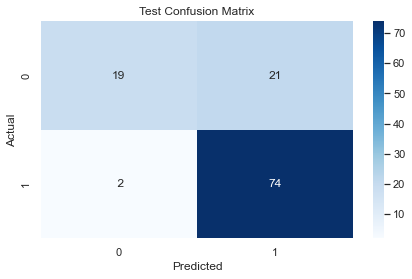

In [541]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification Report 

In [542]:
Classificationreport_train=classification_report(y_train,y_train_pred_XGBF)
Classificationreport_test=classification_report(y_test,y_test_pred_XGB)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.90      0.45      0.60       139
           1       0.81      0.98      0.88       322

    accuracy                           0.82       461
   macro avg       0.85      0.72      0.74       461
weighted avg       0.83      0.82      0.80       461

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.90      0.47      0.62        40
           1       0.78      0.97      0.87        76

    accuracy                           0.80       116
   macro avg       0.84      0.72      0.74       116
weighted avg       0.82      0.80      0.78       116



# Comparing the performance of models using Pretty Table


In [548]:
! pip install PrettyTable

from prettytable import PrettyTable
x=PrettyTable()

In [549]:
x.field_names=['Model_Name','Train_AUC','Test_AUC','Traing_Acc','Test_Acc']


In [550]:
x.add_row(['KNN',85.48,67.82,82.07,77.23])
x.add_row(['Logistic_Regression',71.80,65.47,81.87,77.23])
x.add_row(['Decision Tree',83.29,68.40,83.70,73.98])
x.add_row(['Random_Forest',5.27,72.61,83.91,75.60])
x.add_row(['Xgboost',82.23,70.78,82.28,75.60])

In [551]:
print(x)


+---------------------+-----------+----------+------------+----------+
|      Model_Name     | Train_AUC | Test_AUC | Traing_Acc | Test_Acc |
+---------------------+-----------+----------+------------+----------+
|         KNN         |   85.48   |  67.82   |   82.07    |  77.23   |
| Logistic_Regression |    71.8   |  65.47   |   81.87    |  77.23   |
|    Decision Tree    |   83.29   |   68.4   |    83.7    |  73.98   |
|    Random_Forest    |    5.27   |  72.61   |   83.91    |   75.6   |
|       Xgboost       |   82.23   |  70.78   |   82.28    |   75.6   |
+---------------------+-----------+----------+------------+----------+


# Saving the Model


In [555]:
import joblib

filename='Loan_Application_status_pred'
joblib.dump(RF_clf, filename)

['Loan_Application_status_pred']